# ***Multiple linear Regression: Predict house prices***

Dataset Loaded Successfully!

Checking for missing values:
Area_sqft    0
Bedrooms     0
Bathrooms    0
Price        0
dtype: int64

Dataset Summary:
         Area_sqft   Bedrooms  Bathrooms          Price
count    80.000000  80.000000  80.000000      80.000000
mean   2419.450000   2.575000   2.025000  528881.825000
std     956.557804   1.177586   0.856472  143145.597285
min     621.000000   1.000000   1.000000  259378.000000
25%    1691.750000   1.000000   1.000000  435722.250000
50%    2527.000000   3.000000   2.000000  521918.000000
75%    3243.250000   4.000000   3.000000  626182.750000
max    3985.000000   4.000000   3.000000  821170.000000


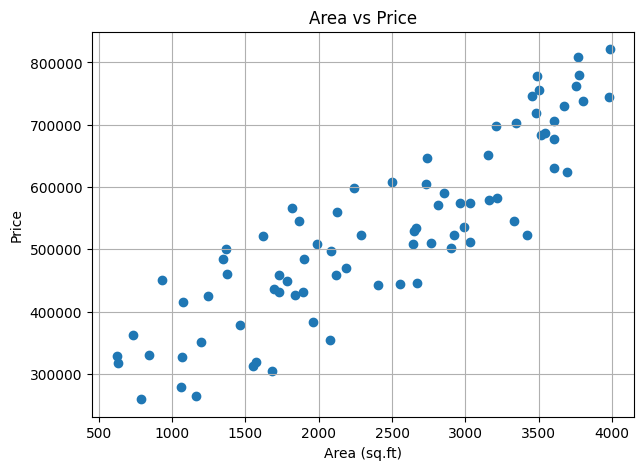

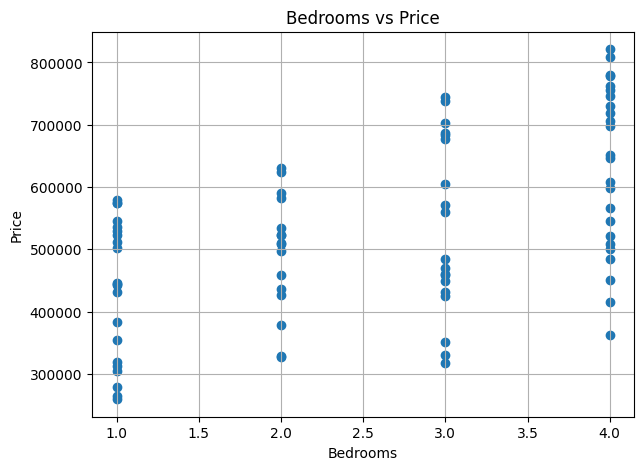

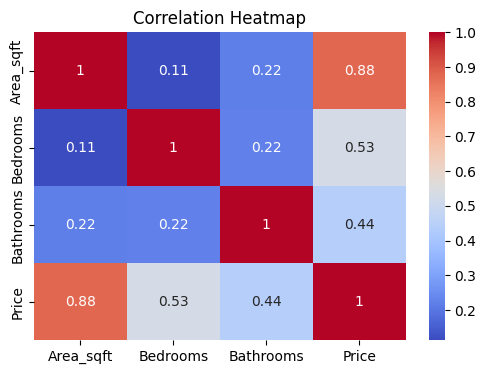


Model Training Completed!
Model Coefficients: [  118.11472805 48199.90319875 29712.26052367]
Model Intercept: 57511.235453617

----- Model Evaluation -----
MAE: 13955.76254492472
MSE: 275498431.583856
RMSE: 16598.145426036488
R² Score: 0.9837365372525324

Enter Custom House Values:
Enter Area (sq.ft): 1500
Enter Bedrooms: 6
Enter Bathrooms: 2

          🏠 HOUSE PRICE PREDICTION 🏠          
📌 AREA       : 1500 sq.ft
📌 BEDROOMS   : 6
📌 BATHROOMS  : 2
-----------------------------------------------
💰 PREDICTED PRICE : ₹ 583,307.27



================= ASCII ART PREDICTION =================
  ____   ___ __________  ___ _____ 
 | ___| ( _ )___ /___ / / _ \___  |
 |___ \ / _ \ |_ \ |_ \| | | | / / 
  ___) | (_) |__) |__) | |_| |/ /  
 |____/ \___/____/____/ \___//_/   
                                   




In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For figlet banner output
!pip install pyfiglet
from pyfiglet import figlet_format

# 2. Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML(extra)/Regression/house-data.csv")
print("Dataset Loaded Successfully!")
df.head()

# 3. Data Preprocessing
print("\nChecking for missing values:")
print(df.isnull().sum())

# Summary stats
print("\nDataset Summary:")
print(df.describe())

# 4. Graphs / Diagrams
# SCATTER PLOT between Area and Price
plt.figure(figsize=(7,5))
plt.scatter(df["Area_sqft"], df["Price"])
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.grid(True)
plt.show()

# SCATTER PLOT between Bedrooms and Price
plt.figure(figsize=(7,5))
plt.scatter(df["Bedrooms"], df["Price"])
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs Price")
plt.grid(True)
plt.show()

# HEATMAP correlation
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 5. Split Data
X = df[['Area_sqft', 'Bedrooms', 'Bathrooms']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Training Completed!")
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# 7. Evaluate Model
y_pred = model.predict(X_test)

print("\n----- Model Evaluation -----")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# 8. Custom User Input Prediction
print("\nEnter Custom House Values:")

area = int(input("Enter Area (sq.ft): "))
bedrooms = int(input("Enter Bedrooms: "))
bathrooms = int(input("Enter Bathrooms: "))

custom_input = pd.DataFrame({
    "Area_sqft": [area],
    "Bedrooms": [bedrooms],
    "Bathrooms": [bathrooms]
})

pred_price = model.predict(custom_input)[0]

# 9.  Output
print("\n===============================================")
print("          🏠 HOUSE PRICE PREDICTION 🏠          ")
print("===============================================")
print(f"📌 AREA       : {area} sq.ft")
print(f"📌 BEDROOMS   : {bedrooms}")
print(f"📌 BATHROOMS  : {bathrooms}")
print("-----------------------------------------------")
print(f"💰 PREDICTED PRICE : ₹ {pred_price:,.2f}")
print("===============================================\n")

# -------------------------------------------------
# 10. FIGLET-STYLE OUTPUT (ASCII Banner)
# -------------------------------------------------
fig_output = figlet_format(f"₹ {int(pred_price)}", font="standard")
print("\n\n================= ASCII ART PREDICTION =================")
print(fig_output)
print("========================================================\n")
